In [1]:
import wisps
import splat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
binar=pd.read_pickle(wisps.OUTPUT_FILES+'/binary_templates.pkl').dropna()

In [3]:
binar

,primary,system,spectrum
0,"[[21.0, 0.0], [26.0, 0.0]]","[21.0, 0.0]",WFC3-G141 spectrum of +
1,"[[21.0, 0.0], [18.0, 0.0]]","[19.0, 1.0]",WFC3-G141 spectrum of +
2,"[[21.0, 0.0], [22.0, 1.0]]","[21.0, 0.0]",WFC3-G141 spectrum of +
3,"[[21.0, 0.0], [29.0, 0.0]]","[21.0, 0.0]",WFC3-G141 spectrum of +
4,"[[21.0, 0.0], [37.0, 0.0]]","[21.0, 0.0]",WFC3-G141 spectrum of +
...,...,...,...
15748,"[[40.0, 0.0], [40.0, 0.0]]","[40.0, 0.0]",WFC3-G141 spectrum of +
15749,"[[40.0, 0.0], [41.0, 0.0]]","[40.0, 0.0]",WFC3-G141 spectrum of +
15750,"[[41.0, 0.0], [40.0, 0.0]]","[40.0, 0.0]",WFC3-G141 spectrum of +
15751,"[[41.0, 0.0], [41.0, 0.0]]","[41.0, 0.0]",WFC3-G141 spectrum of +


In [4]:
primary_spts=np.vstack(binar.primary.apply(lambda x: [x[0][0], x[1][0]]))

In [5]:
system_spts=binar.system.apply(wisps.make_spt_number).values

In [6]:
df=pd.DataFrame()
df['prim']=primary_spts[:,0]
df['sec']=primary_spts[:,1]
df['sys']=np.vstack(system_spts)[:,0]

In [7]:
import seaborn as sns

In [8]:
cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True)

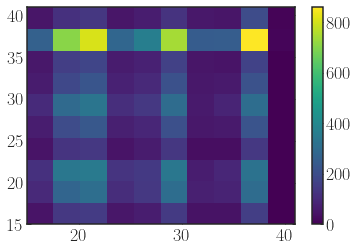

In [9]:
h=plt.hist2d(primary_spts[:,0], primary_spts[:,1], cmap='viridis')
cb=plt.colorbar()

In [10]:
df=(df[(df.prim<=df.sec) &( df.sys >15.)]).reset_index(drop=True).applymap(float)

In [11]:
#df['diff']=df.prim-df.sec

In [12]:
#df=(df[df.new_prim>=df.new_sec]).reset_index(drop=True).applymap(float)

In [13]:
df['diffr']=df['prim']-df['sec']

In [14]:
kdspt=wisps.kernel_density(df['diffr'].values)

In [69]:
acc=pd.DataFrame()

In [70]:
acc['sys_number']=df.groupby('sys').apply(lambda x: len(x.sys))

In [71]:
acc['prim_number']=df.groupby('prim').apply(lambda x: len(x.prim))

In [72]:
acc['ratio']=acc.sys_number/acc.prim_number

In [77]:
acc['sys_difference']=df.groupby('sys').apply(lambda x: np.nanmean(x.sys-x.prim))

In [78]:
acc['sys_difference_std']=df.groupby('sys').apply(lambda x: np.nanstd(x.sys-x.prim))

In [79]:
cmap=sns.diverging_palette(240, 10, n=9, as_cmap=True)

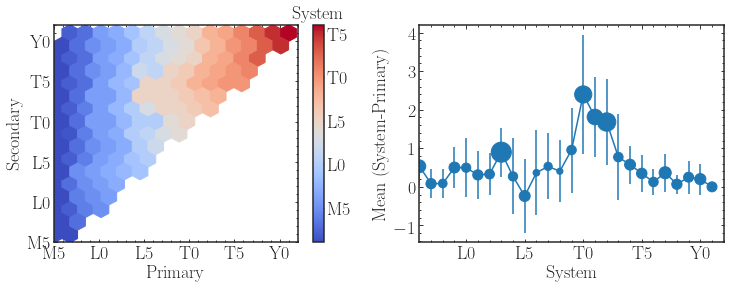

In [81]:
fig, (ax, ax1)=plt.subplots(figsize=(12,4), ncols=2)
df.plot.hexbin(x='prim', y='sec', C='sys', reduce_C_function=np.nanmedian, gridsize=15, cmap='coolwarm', ax=ax)
ax.set_xlabel('Primary', fontsize=18)
ax.set_ylabel('Secondary', fontsize=18)
#fig.axes[-1].set_title('Composite', fontsize=18)
#plt.tight_layout()



#sns.kdeplot(df.prim, df.sys,  ax=ax1, shade=False)
c=ax1.errorbar(acc.index, acc.sys_difference, yerr=acc.sys_difference_std)
ax1.scatter(acc.index, acc.sys_difference, s=acc.ratio*100)
#ax1.set_xlabel('Primary', fontsize=18)
#ax1.set_ylabel('System', fontsize=18)


fig.axes[-1].set_title('System', fontsize=18)

ax1.minorticks_on()
ax.minorticks_on()

#ax1.plot(df.prim, df.prim, c='k')


ax.set_xticks([15, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.set_yticks([15, 20, 25, 30, 35, 40])
ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])

ax1.set_xticks([15, 20, 25, 30, 35, 40])
ax1.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    
#cbar=plt.colorbar(c)
#ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    

fig.axes[-1].set_yticks([15, 20, 25, 30, 35, 40])
fig.axes[-1].set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])

#fig.axes[-1].set_yticks([15, 20, 25, 30, 35, 40])
#fig.axes[-1].set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])

ax.set_xlim([15, 42])
ax.set_ylim([15, 42])


ax1.set_xlim([16, 42])

ax1.set_xlabel('System', fontsize=18)
ax1.set_ylabel(r' Mean (System-Primary) ', fontsize=18)
#plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/composite_types.pdf', bbox_inches='tight')

In [23]:
df.to_pickle(wisps.OUTPUT_FILES+'/binary_lookup_table.pkl')

In [24]:
 tpls=pd.read_pickle(wisps.OUTPUT_FILES+'/binary_spex.pkl')

In [25]:
def combine_two_spectra(sp10, sp20):
    """
    sp1 and sp2 are splat objects
    """	

    
    sp1=sp10.splat_spectrum
    sp2=sp20.splat_spectrum
    
    absj0=(wisps.absolute_magnitude_jh(wisps.make_spt_number(sp10.spectral_type[0]))[1]).flatten()[0]
    absj1=(wisps.absolute_magnitude_jh(wisps.make_spt_number(sp20.spectral_type[0]))[1]).flatten()[0]



    sp1.fluxCalibrate('2MASS H',  absj0)
    sp2.fluxCalibrate('2MASS H',  absj1)
    
        
    sp3=sp1+sp2
    
    plt.plot(sp3.wave, sp3.flux)
    plt.plot(sp2.wave, sp2.flux)
    plt.plot(sp1.wave, sp1.flux)
    return {'primary': [sp10.spectral_type, sp20.spectral_type], 
    'spectrum': sp3}

{'primary': [array([21.,  0.]), array([20.,  1.])],
 'spectrum': WFC3-G141 spectrum of  + }

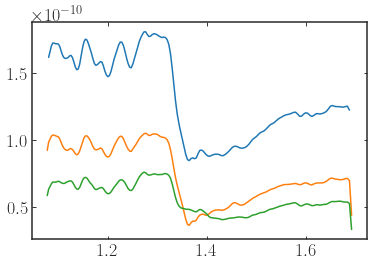

In [26]:
combine_two_spectra(tpls.spectra.iloc[0], tpls.spectra.iloc[30])